# Handwritten digits recognition

In [1]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [2]:
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[105]
print("Shape for single: {}".format(single.shape))

display(pd.DataFrame(single.reshape(28,28)))

Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,255,254,140,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,253,228,67,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,253,58,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,253,17,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,157,8,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,77,0,0,0,0,0,0,0,0,0


Image (#105): Which is digit '1'


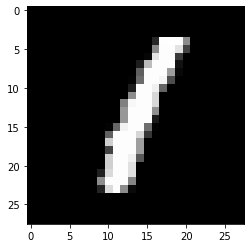

In [3]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 105 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

In [4]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])




model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 - 94s - loss: 0.2364 - acc: 0.9281 - val_loss: 0.0520 - val_acc: 0.9821
Epoch 2/12
 - 93s - loss: 0.0840 - acc: 0.9748 - val_loss: 0.0424 - val_acc: 0.9853
Epoch 3/12
 - 94s - loss: 0.0623 - acc: 0.9819 - val_loss: 0.0358 - val_acc: 0.9876
Epoch 4/12
 - 93s - loss: 0.0522 - acc: 0.9843 - val_loss: 0.0302 - val_acc: 0.9910
Epoch 5/12
 - 92s - loss: 0.0451 - acc: 0.9863 - val_loss: 0.0305 - val_acc: 0.9905
Epoch 6/12
 - 92s - loss: 0.0390 - acc: 0.9878 - val_loss: 0.0278 - val_acc: 0.9906
Epoch 7/12
 - 92s - loss: 0.0336 - acc: 0.9891 - val_loss: 0.0284 - val_acc: 0.9913
Epoch 8/12
 - 92s - loss: 0.0304 - acc: 0.9901 - val_loss: 0.0343 - val_acc: 0.9898
Epoch 9/12
 - 92s - loss: 0.0291 - acc: 0.9904 - val_loss: 0.0278 - val_acc: 0.9917
Epoch 10/12
 - 92s - loss: 0.0251 - acc: 0.9918 - val_loss: 0.0280 - val_acc: 0.9916
Epoch 11/12
 - 91s - loss: 0.02

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)

In [7]:
from sklearn import metrics

# For GPU just grab the first 100 images
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

Accuracy: 0.98989898989899
